In [70]:
import numpy as np
import scipy.io as sio
import moviepy as mpy
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
import matplotlib.pyplot as plt

In [ ]:
# Install a pip package in the current Jupyter kernel if package isnt instsalled
import sys
!{sys.executable} -m pip install moviepy

In [78]:
# Load data and define variables 
ds = sio.loadmat('cell_29.mat')['export_struct'][0,0]

trial = np.random.choice(ds['thetaAtBase'].shape[1],1)[0]
x = np.arange(0,len(ds['spikes']))
amplitude_mask = ds['amplitude'][:,trial]<5
filtered_phase = ds['phase'][:,trial]
filtered_phase[amplitude_mask] = np.nan 
y0 = ds['thetaAtBase'][:,trial]
y1 = ds['amplitude'][:,trial]
y2 = ds['setpoint'][:,trial]
y3 = filtered_phase

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


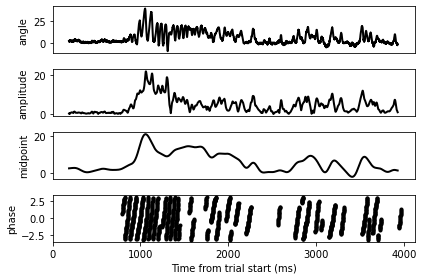

In [81]:
# Set up plots for animation 
fig, ax = plt.subplots(4,1)
l0, = ax[0].plot(x, y0, lw=2, c='k')
l1, = ax[1].plot(x, y1, lw=2, c='k')
l2, = ax[2].plot(x, y2, lw=2, c='k')
l3, = ax[3].plot(x, y3, 'k.')

labels = ['angle', 'amplitude', 'midpoint', 'phase']
for ix,k in enumerate(ax):
    ax[ix].set_xticks([])
    ax[ix].set_ylabel(labels[ix])
ax[3].set_xticks([0,1000,2000,3000,4000])
ax[3].set_xlabel("Time from trial start (ms)")
fig.tight_layout() 

# Animate figure with moviepy 
def plot_until_t(t):
    t_idx = int(round(duration*(t/10)))
    for idx,val in enumerate(ax):
        exec('l' + str(idx) + '.set_xdata(x[:t_idx])')
        exec('l' + str(idx) + '.set_ydata(y' + str(idx) +'[:t_idx])')
    return mplfig_to_npimage(fig)

plotclip = VideoClip(plot_until_t, duration=10)
plotclip.ipython_display(fps=40, loop=True, autoplay=True,progress_bar=False)